## Graduate Admission Prediction

### Data and Overview:

The data set is obtained from the kaggle website https://www.kaggle.com/mohansacharya/graduate-admissions .This contains the scores of GRE, TOEFL, University Rating, SOP, LOR and CGPA. Based on these, a model is developed such that it predicts the chance of admit precisely.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing and reading data

In [2]:
df=pd.read_csv("admission_predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Exploring the dataset


#####  Checking Number of rows and columns in the dataset

In [3]:
df.shape

(500, 9)

##### Checking all the columns

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##### Checking basic information on all the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


##### Checking basic statistics results on numeric columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


##### Checking different datatypes for each columns (float, int, string, bool etc.)

In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

There are no data types that are categorical. Hence, preprocessing is not necessary.

##### Checking the dataset for any null values

In [8]:
df.isnull().sum()
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

There are no null values and hence it is good to proceed with analysis.

##### Renaming the columns with appropriate names

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df=df.rename(columns={"GRE Score":"GRE","TOEFL Score":"TOEFL","LOR ":"LOR","Chance of Admit ":"Probability"})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


df.columns

In [11]:
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visualization and Analysis

##### Visualizing the feature GRE

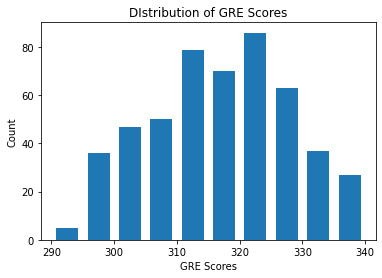

In [12]:
fig=plt.hist(df["GRE"],rwidth=0.7)
plt.title("DIstribution of GRE Scores")
plt.xlabel("GRE Scores")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature TOEFL


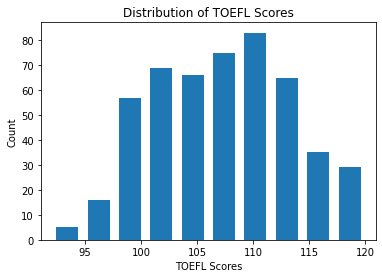

In [13]:
fig=plt.hist(df["TOEFL"],rwidth=0.7)
plt.title("Distribution of TOEFL Scores")
plt.xlabel("TOEFL Scores")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature University Rating

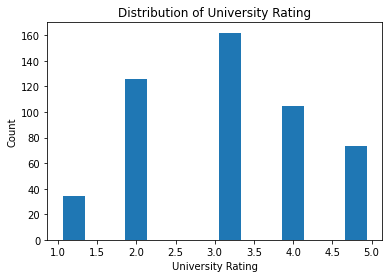

In [14]:
fig=plt.hist(df["University Rating"],rwidth=0.7)
plt.title("Distribution of University Rating")
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature SOP

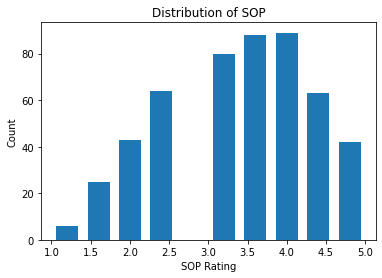

In [15]:
fig=plt.hist(df["SOP"],rwidth=0.7)
plt.title("Distribution of SOP")
plt.xlabel("SOP Rating")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature LOR

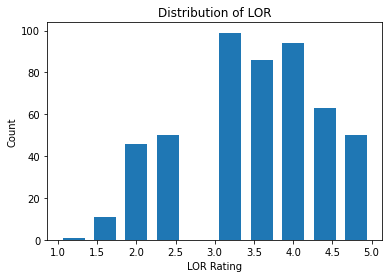

In [16]:
fig=plt.hist(df["LOR"],rwidth=0.7)
plt.title("Distribution of LOR")
plt.xlabel("LOR Rating")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature CGPA

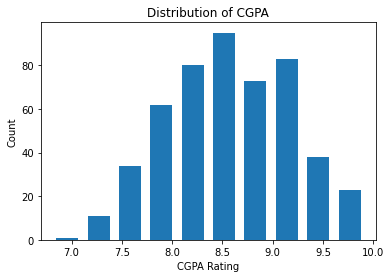

In [17]:
fig=plt.hist(df["CGPA"],rwidth=0.7)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA Rating")
plt.ylabel("Count")
plt.show()

##### Visualizing the feature Research

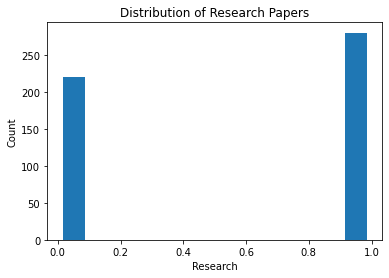

In [18]:
fig=plt.hist(df["Research"],rwidth=0.7)
plt.title("Distribution of Research Papers")
plt.xlabel("Research")
plt.ylabel("Count")
plt.show()

### Plotting a pair plot for better understanding our data set

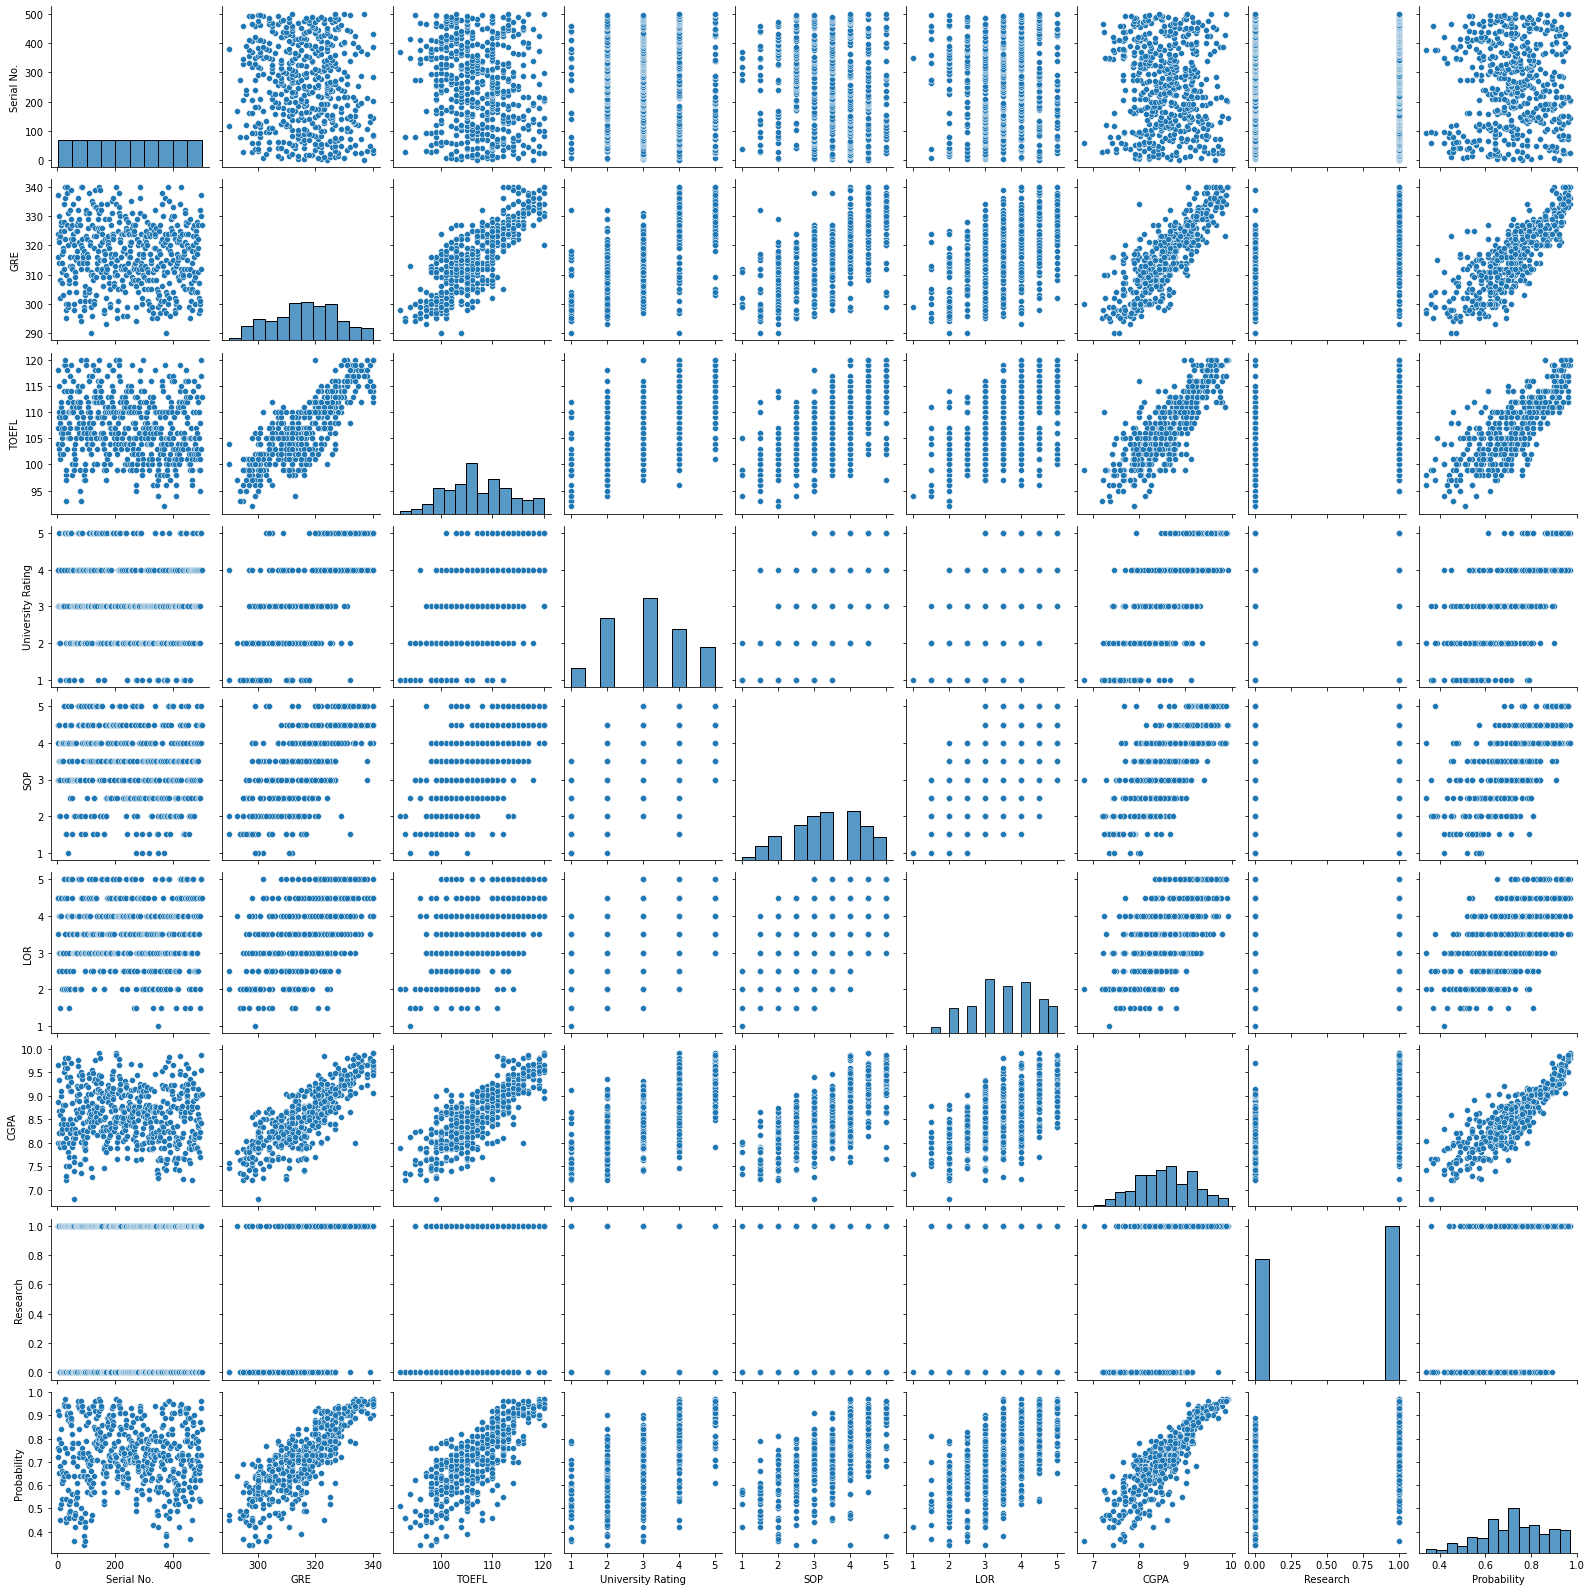

In [19]:
sns.pairplot(df)

### Let's plot a heatmap to see the correlation of all the features compared to Chance to Admit:

<AxesSubplot:>

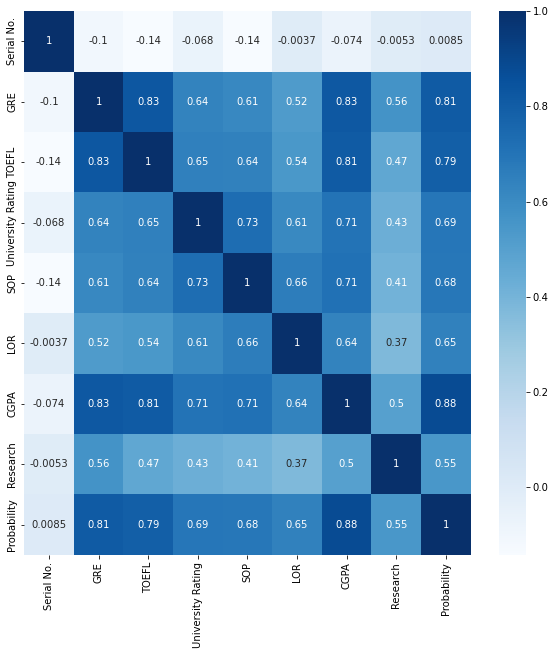

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

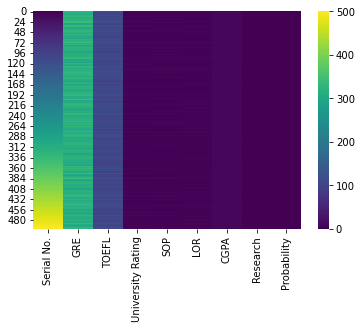

In [21]:
sns.heatmap(df, cbar= True,cmap="viridis")

The top three features that affect the Probability are:


CGPA

GRE

TOEFL


Let's explore these three features to get a better understanding.



CGPA: The Cumulative Grade Point Average is a 10 point grading system. From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

CGPA vs Chance of Admit: It appears as applicant's CGPA has a strong correlation with their Probability.

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CGPA vs Probability')

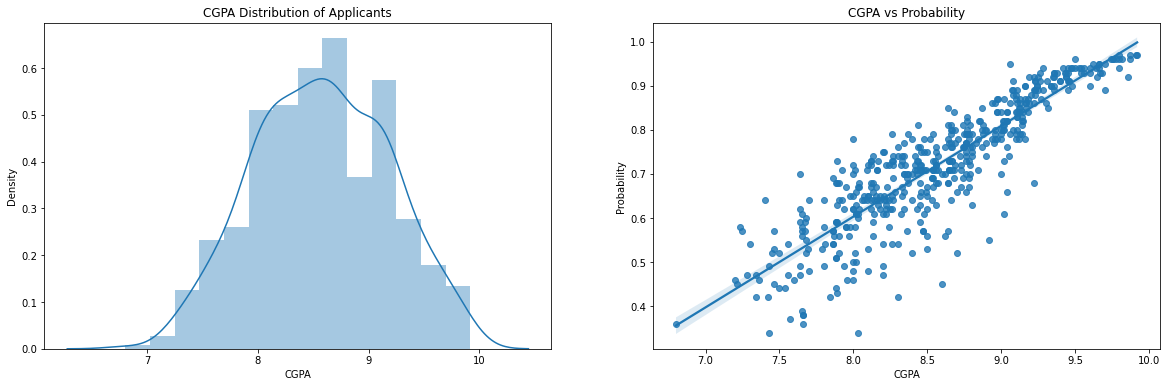

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Probability'])
plt.title('CGPA vs Probability')


### GRE SCORE

In [23]:
'''

The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

Analytical Writing (Scored on a 0-6 scale in half-point increments)
Verbal Reasoning (Scored on a 130-170 scale)
Quantitative Reasoning (Scored on a 130-170 scale)
In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.
'''

"\n\nThe Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:\n\nAnalytical Writing (Scored on a 0-6 scale in half-point increments)\nVerbal Reasoning (Scored on a 130-170 scale)\nQuantitative Reasoning (Scored on a 130-170 scale)\nIn this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.\n"

### GRE Score vs Probability

GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GRE Scores vs Probability')

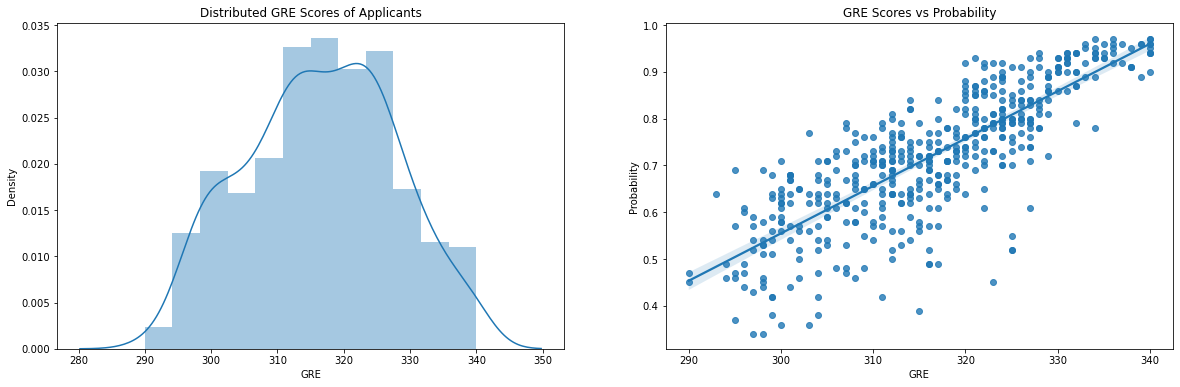

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE'], df['Probability'])
plt.title('GRE Scores vs Probability')

### TOEFL SCORE


The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

Reading

Listening

Speaking

Writing


All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

### TOEFL SCORE VS Probability

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOEFL Scores vs Probability')

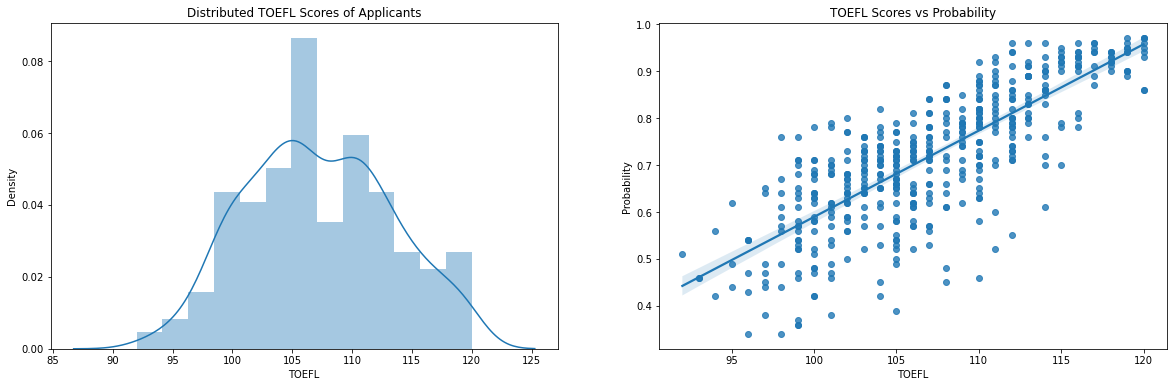

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL'], df['Probability'])
plt.title('TOEFL Scores vs Probability')

For my curiosity, I want to explore the data a little bit further regarding research and university rankings. Even though they hold a lower importance in the chance of admission, it would be nice to understand their characteristics in the dataset.


### Research


Let's explore how many applicants have research experience.


It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No Research Experience'), Text(1, 0, 'Has Research Experience')]

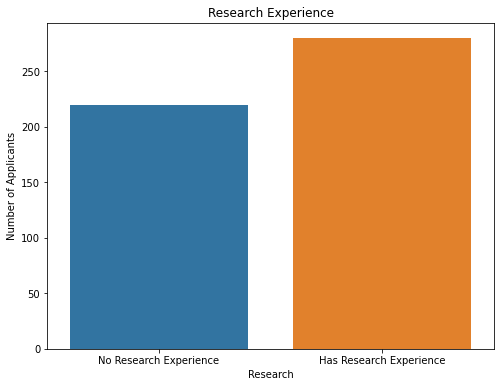

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

### University Ranking

Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Applicants')

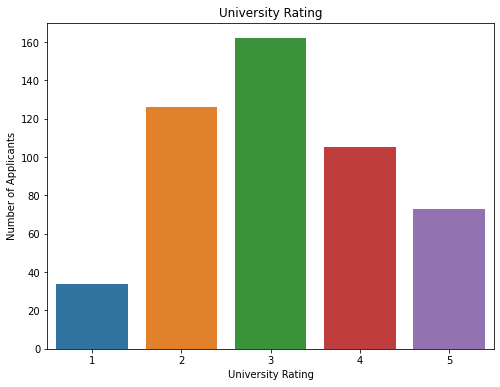

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')


### Data Cleaning

##### Dropping the column "Serial No." since it is not necessary.

In [28]:
df.drop("Serial No.", axis="columns",inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


##### Replacing the 0 values from ["GRE","TOEFL","University Rating","SOP","LOR","CGPA"] by NaN

In [29]:
df_copy=df.copy(deep=True)
df_copy[["GRE","TOEFL","University Rating","SOP","LOR","CGPA"]]=df_copy[["GRE","TOEFL","University Rating","SOP","LOR","CGPA"]].replace(0,np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

### Model Building

##### spliting the dataset in features and Label

In [30]:
X=df_copy.drop("Probability",axis="columns")
y=df_copy["Probability"]

##### Importing different Machine Learning algorithms and GridSearchCV algorithms for better Accuracy

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

##### Creating a function to calculate best model for this problem

In [32]:
def find_best_model(X,y):
    models={
        "linear_regression":{
            "model":LinearRegression(),
            "parameters":{
                "normalize":[True,False]
            }
        },
        
        "lasso":{
            "model":Lasso(),
            "parameters":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        
        "svr":{
            "model":SVR(),
            "parameters":{
                "gamma":["auto","scale"]
            }
        },
        
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "parameters":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        },
        
        "random_forest":{
            "model":RandomForestRegressor(criterion="mse"),
            "parameters":{
                "n_estimators":[5,10,15,20]
            }
        },
        
        "knn":{
            "model":KNeighborsRegressor(algorithm="auto"),
            "parameters":{
                "n_neighbors":[2,5,10,20]
            }
        }
    }
    
    
    scores=[]
    for model_name, model_params in models.items():
        gs=GridSearchCV(model_params["model"], model_params["parameters"],cv=5,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":model_name,
            "best_parameters":gs.best_params_,
            "score":gs.best_score_
        })
        
    return pd.DataFrame(scores,columns=["model","best_parameters","score"])

find_best_model(X,y)

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.575285
4,random_forest,{'n_estimators': 20},0.772349
5,knn,{'n_neighbors': 20},0.722961


#### Since the Linear Model Regression algorithms has the highest accuracy, the model selected for this problem is Linear Regression

##### using cross-validation-score for gaining the highest accuracy

In [33]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(normalize=True),X,y,cv=5)
print("Highest Accuracy: {}%".format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy: 81%


##### Spliting the dataset into train and test samples


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=5)
print(len(X_train),len(X_test))

400 100


### Creating a Linear Regression model

In [35]:
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.821478736588966

In [36]:
y_pred=model.predict(X_test)

In [37]:
y_pred

array([0.61056466, 0.75998806, 0.76992962, 0.96873068, 0.71899068,
       0.7216282 , 0.62068633, 0.69473526, 0.64140404, 0.77613098,
       0.53617622, 0.4519449 , 0.90816066, 0.79538136, 0.71865631,
       0.5939505 , 0.65172761, 0.90681754, 0.7782871 , 0.8255008 ,
       0.81379307, 0.62140631, 0.82940238, 0.82108197, 0.96330719,
       0.6606226 , 0.61798617, 0.68128784, 0.64789427, 0.51831439,
       0.60802631, 0.66965794, 0.87085783, 0.73896649, 0.81489255,
       0.83777696, 0.55149591, 0.70541517, 0.60647231, 0.86577459,
       0.75454935, 0.63133324, 0.81197417, 0.87494279, 0.66159619,
       0.95995425, 0.99221047, 0.66303669, 0.68130775, 0.51882068,
       0.74500185, 0.77027975, 0.6853063 , 0.41916157, 0.51547603,
       0.89449721, 0.83981921, 0.80261679, 0.53853568, 0.71503081,
       0.72461042, 0.63973854, 0.63976173, 0.5798459 , 0.60227799,
       0.64821398, 0.55237375, 0.78478397, 0.63669745, 0.69559507,
       0.85100424, 0.50931181, 0.60770257, 0.70872661, 0.66601

### Post assumptions

1. Linearity

2. No Multicolinearity

3. Mean of the residuals is zero

4. Homoscedasticity

5. Residuals Normality

### Linearity check

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


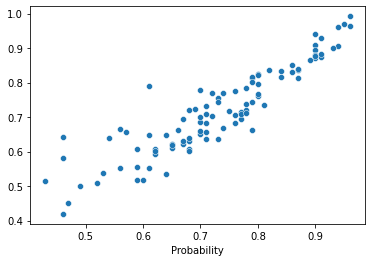

In [38]:
sns.scatterplot(y_test,y_pred)
plt.show()

### Residuals Normality

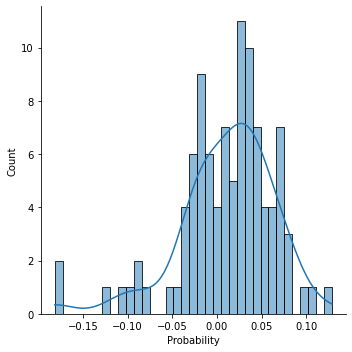

In [39]:
sns.displot((y_test-y_pred),bins=35,kde=True)
plt.show()


### Regression Evaluation Metrics

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [41]:
print("Mean absolute error:", mean_absolute_error(y_test, y_pred) )
print("Mean squared error:",mean_squared_error(y_test, y_pred) )
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, y_pred)) )
print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test,y_pred))

Mean absolute error: 0.04173498667092054
Mean squared error: 0.002918999392821184
Root Mean squared error: 0.05402776501782379
Mean absolute percentage error: 0.06251115071055888


### Homoscedasticity

C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


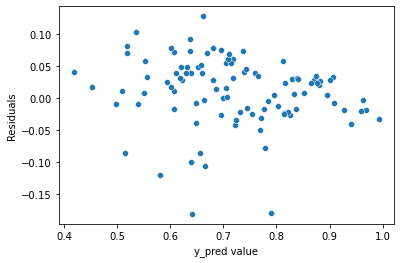

In [42]:
sns.scatterplot(y_pred,y_test-y_pred,)
plt.xlabel('y_pred value')
plt.ylabel('Residuals')
plt.show()

In [43]:
#Creating Linear Regression Model
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.821478736588966

### Model Coefficients

In [44]:
pd.DataFrame(model.coef_,X_train.columns,columns=['Coeficients'])

,Coeficients
GRE,0.001775
TOEFL,0.002672
University Rating,0.006987
SOP,-0.000515
LOR,0.016687
CGPA,0.125163
Research,0.023725


### Predicting the values using our trained model

#### prediction 1

##### input in the form: GRE, TOEFL,University Rating,SOP,LOR,CGPA,Research

In [45]:
print("Chance of getting into UCLA is {}%".format(round(model.predict([[337,118,4,4.5,4.5,9.65,0]])[0]*100, 3)))

Chance of getting into UCLA is 92.855%


#### prediction 2

##### input in the form: GRE, TOEFL,University Rating,SOP,LOR,CGPA,Research

In [46]:
print("Chance of getting into UCLA is {}%".format(round(model.predict([[320,113,2,2.0,2.5,8.64,1]])[0]*100, 3)))

Chance of getting into UCLA is 73.627%


### Predictions by the user input

In [47]:
GRE_SCORE=int(input("Enter Your GRE Score: "))
TOEFL_SCORE=int(input("Enter Your TOFEL Score: "))
UNIVERSITY_RATING_SCORE=float(input("Enter Your University Rating: "))
SOP_SCORE=float(input("Enter Statement of Purpose Rating(SOP): "))
LOR_SCORE=float(input("Enter Your LOR Score: "))
CGPA_SCORE=float(input("Enter Your CGPA SCORE: "))
RESEARCH_SCORE=int(input("Have you did any research ? Please ansewer(YES:1/NO:0): " ))


print("Probability of getting the college is {}%".format(round(model.predict([[GRE_SCORE,TOEFL_SCORE,UNIVERSITY_RATING_SCORE,SOP_SCORE,LOR_SCORE,CGPA_SCORE,RESEARCH_SCORE]])[0]*100, 3)))

Enter Your GRE Score: 337
Enter Your TOFEL Score: 118
Enter Your University Rating: 4
Enter Statement of Purpose Rating(SOP): 4.5
Enter Your LOR Score: 4.5
Enter Your CGPA SCORE: 9.65
Have you did any research ? Please ansewer(YES:1/NO:0): 0
Probability of getting the college is 92.855%


### Creating Requirement.txt file

In [48]:
pip freeze > requirements_College_predictions.txt

Note: you may need to restart the kernel to use updated packages.


### Creating pickle file

In [49]:
import pickle

filename="College_Predictions_Based_on_GRE_and_TOEFL"

pickle.dump(model,open(filename,"wb"))